#### The objective of this assignment is to implement a text classification task using Recurrent Neural Networks (RNNs). You will build a model to classify text data into predefined categories using Python. 

Dataset:

Use the given dataset Spam & Ham, it contains below columns

Class: Spam or Ham

Message: Email content


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head()


,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Steps to include;
1.	Preprocess the dataset by tokenizing the text, removing stop words, and performing any other necessary preprocessing steps.


In [33]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to C:\Users\Logavanan
[nltk_data]     A\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
def preprocess(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [ps.stem(w) for w in words if w not in stop_words]
    return " ".join(words)


In [35]:
df["Clean_Message"] = df["message"].apply(preprocess)
df.head()

,class,message,Clean_Message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [36]:
df["class"] = df["class"].map({"ham": 0, "spam": 1})
y = df["class"].values


In [37]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df["Clean_Message"])

X = tokenizer.texts_to_sequences(df["Clean_Message"])
vocab_size = len(tokenizer.word_index) + 1

max_len = 50
X = pad_sequences(X, maxlen=max_len)


#### 2.	Split the dataset into training and testing sets.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4457, 50), (1115, 50), (4457,), (1115,))

#### 3.	Train your RNN model on the training data.

In [39]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len))
model.add(SimpleRNN(64))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9209 - loss: 0.2334 - val_accuracy: 0.9709 - val_loss: 0.0945
Epoch 2/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9877 - loss: 0.0441 - val_accuracy: 0.9776 - val_loss: 0.0690
Epoch 3/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9961 - loss: 0.0137 - val_accuracy: 0.9787 - val_loss: 0.0682
Epoch 4/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9986 - loss: 0.0062 - val_accuracy: 0.9753 - val_loss: 0.0815
Epoch 5/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9997 - loss: 0.0025 - val_accuracy: 0.9776 - val_loss: 0.0863


#### 
4.	Monitor the training process by observing metrics such as loss and accuracy.
5.	Evaluate the trained model on the testing data.
6.	Calculate evaluation metrics such as accuracy, precision, recall, and F1-score to assess the performance of your model.
7.	Analyse the performance of your model. Identify any trends or patterns in the results.
8.	Discuss the strengths and weaknesses of using RNNs for text classification tasks.


In [40]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Accuracy : 0.9856502242152466
Precision: 0.9925925925925926
Recall   : 0.8993288590604027
F1 Score : 0.9436619718309859

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.90      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



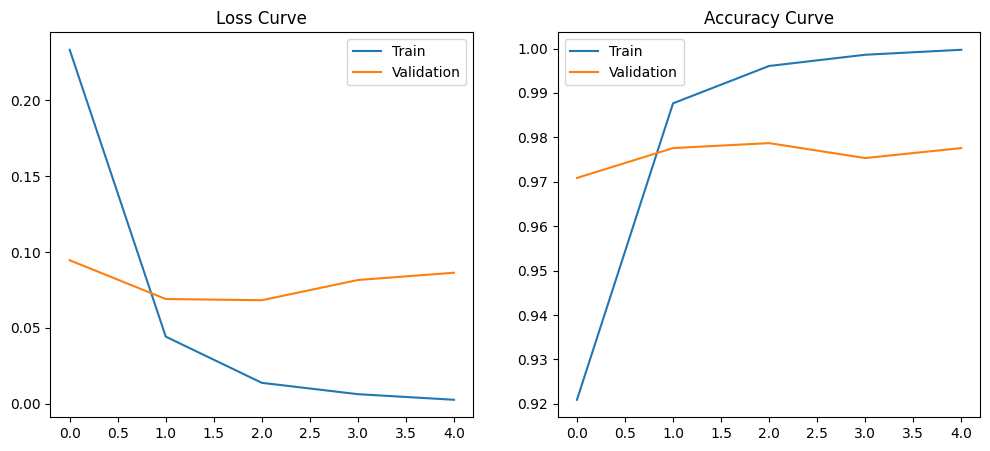

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss Curve")
plt.legend(["Train", "Validation"])

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy Curve")
plt.legend(["Train", "Validation"])

plt.show()
